# Task 1 - TITANIC SURVIVAL PREDICTION
# Linu Roby


The Iris flower dataset consists of three species: setosa, versicolor, and
virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements of Iris
flowers categorized by their respective species. Your objective is to
train a machine learning model that can learn from these
measurements and accurately classify the Iris flowers into their
respective species.

In [86]:
# Importing required libraries
import sklearn.datasets as datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

In [87]:
# Load the provided dataset in csv
dataset = pd.read_csv("Titanic-Dataset.csv")
print("Total number of samples : ",len(dataset))
# View a few rows from the dataset
dataset.head(10)

Total number of samples :  891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Exploratory Data Analysis

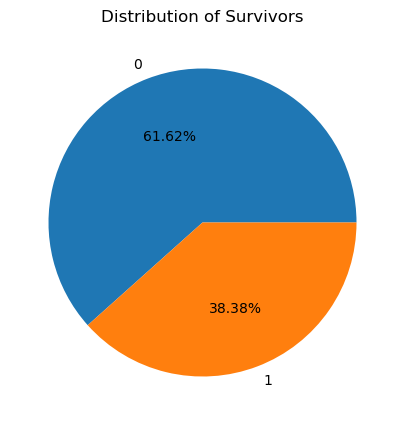

In [88]:
# View distribution of each class in a pie chart
dataset['Survived'].value_counts()
x_label = dataset['Survived'].value_counts().index
y_label = dataset['Survived'].value_counts().values
plt.figure(figsize=(5,5))
plt.pie(y_label,labels=x_label,autopct='%0.2f%%')
plt.title("Distribution of Survivors")
plt.show()

In [89]:
# Check for any null values
dataset.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age, Cabin and Embarked columns has null values. Handle the null values

In [90]:
dataset['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

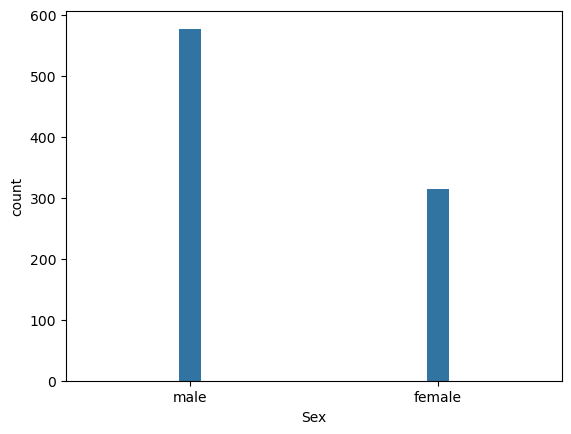

In [91]:
sns.countplot(x = dataset['Sex'],width = 0.09)

In [92]:
dataset['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [93]:
dataset['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [94]:
# Fill empty Age values with the mean value of Age
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [95]:
# Cabin null values are replaced with the previous non null value
dataset['Cabin'] = dataset['Cabin'].ffill()

In [96]:
# Embarked null values are replaced with the previous non null value
dataset['Embarked'] = dataset['Embarked'].ffill()

In [97]:
# Convert the categorical values to numerical
label_encode = LabelEncoder()
dataset['Sex'] = label_encode.fit_transform(dataset['Sex'])
dataset['Embarked'] = label_encode.fit_transform(dataset['Embarked'])
dataset['Cabin'] = label_encode.fit_transform(dataset['Cabin'])

In [98]:
# For training, add only the required columns which are relevant
x_data = dataset.drop(columns=['PassengerId','Name','Survived','Ticket'])
y_data = dataset['Survived']

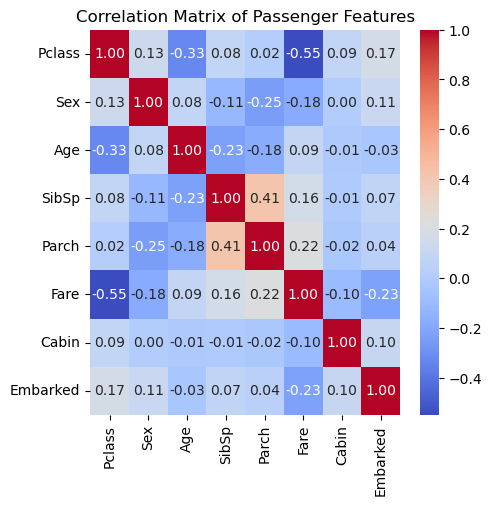

In [99]:
# Check the correlation between features
corr_matrix = x_data.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Passenger Features')
plt.show()

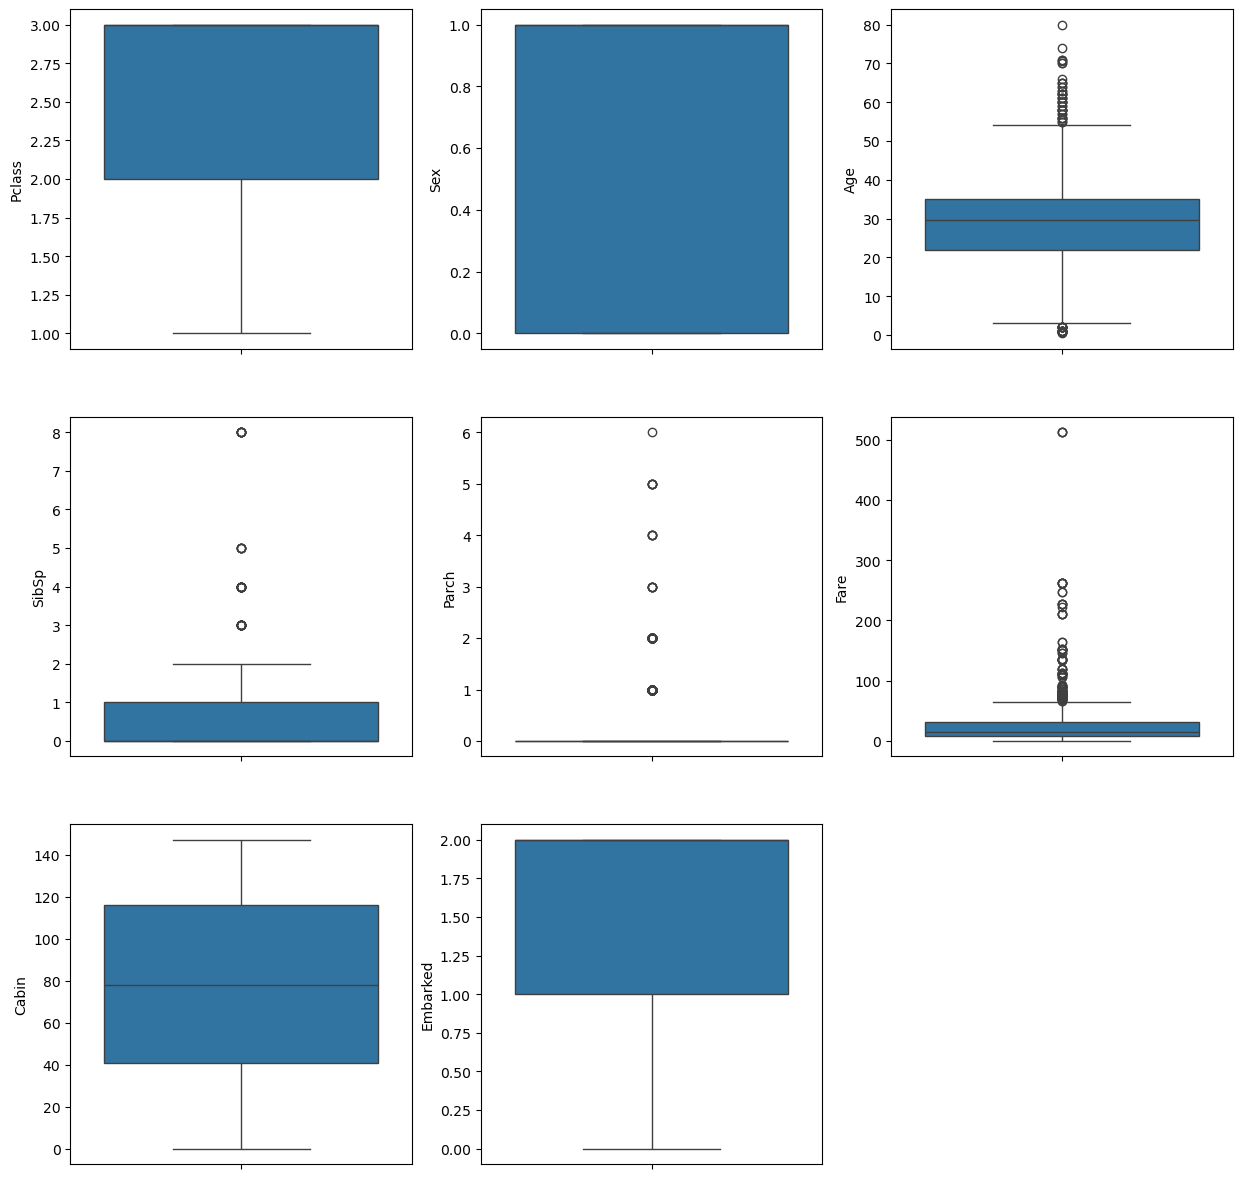

In [100]:
# Visualise Boxplot for outliers
plt.figure(figsize=(15,15))

for i, column in enumerate(x_data.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=x_data[column])
plt.show()

In [101]:
print("Features:\n",x_data.head(1),"\nTarget\n",y_data.head(1))

Features:
    Pclass  Sex   Age  SibSp  Parch  Fare  Cabin  Embarked
0       3    1  22.0      1      0  7.25    147         2 
Target
 0    0
Name: Survived, dtype: int64


In [102]:
# Split into train and test data (80-20)
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2,random_state=42)
print("No: of training samples :",len(x_train))
print("No: of testing samples :",len(x_test))

No: of training samples : 712
No: of testing samples : 179


# Decision Tree Classifier

In [103]:
# Decision Tree Classifier
titanic_model = DecisionTreeClassifier()
# Fit with train data
titanic_model.fit(x_train,y_train)
print("Training completed using Decision Tree Classifier")

Training completed using Decision Tree Classifier


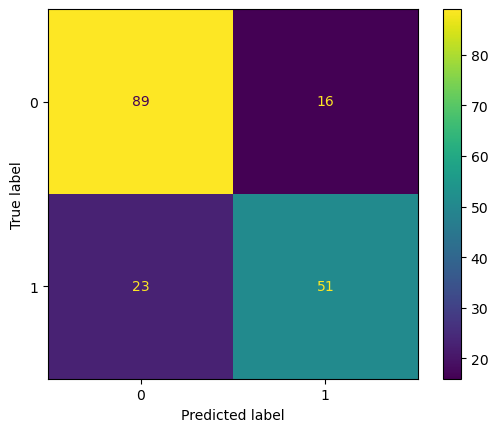

In [104]:
# Test prediction using test data
predicted = titanic_model.predict(x_test)

In [105]:
# Print the accuracy of the model
print("Accuracy of the decision tree classifier : ",accuracy_score(y_test,predicted)*100,"%")

Accuracy of the decision tree classifier :  78.2122905027933 %


# RandomForest Classifier

In [106]:
# RandomForest Classifier
titanic_rf = RandomForestClassifier(n_estimators=15)
# Fit with train data
titanic_rf.fit(x_train,y_train)
print("Training completed using RandomForest Classifier")

Training completed using RandomForest Classifier


In [107]:
# Test prediction using test data
predicted_rf = titanic_rf.predict(x_test)
# Print the accuracy of the random forest model
print("Accuracy of the randomforest classifier : ",accuracy_score(y_test,predicted_rf)*100,"%")

Accuracy of the randomforest classifier :  82.68156424581005 %


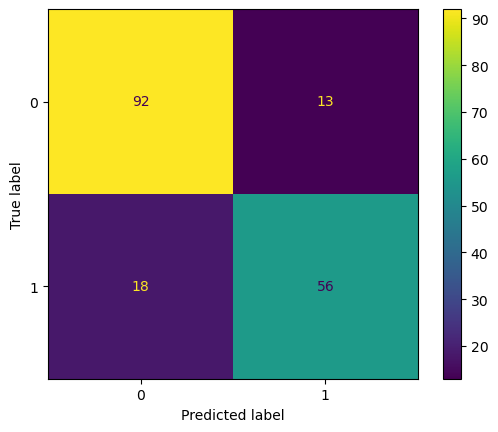

In [108]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test,predicted_rf)
display_confusion = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=titanic_model.classes_)
display_confusion.plot()

# Compare Actual vs Predicted values

In [110]:
compare = pd.DataFrame({'Survived':y_test,'Prediction':predicted_rf})
compare.head(20)

,Survived,Prediction
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
290,1,1
300,1,1
333,0,0
208,1,1
136,1,1
